Dans cette première cellule de code, je calcule le nombre de

4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.00909090909090909
10 0.017482517482517484
11 0.016483516483516484
12 0.01978021978021978
13 0.02857142857142857
14 0.027941176470588237
15 0.02696078431372549
16 0.03611971104231166
17 0.042105263157894736
18 0.0406015037593985
19 0.045454545454545456
20 0.04517221908526256
21 0.04841897233201581
22 0.05478260869565217
23 0.05307692307692308
24 0.054017094017094015
25 0.059218559218559216
26 0.06102900930487137
27 0.061083743842364535
28 0.06340378197997776
29 0.06612903225806452
30 0.0657991202346041
31 0.06851604278074866
32 0.06829640947288006
33 0.07058823529411765
34 0.07258687258687259
35 0.07183499288762446
36 0.07374986322354743
37 0.07651821862348178
38 0.07692307692307693
39 0.07630662020905923
40 0.07811360505631634
41 0.080338266384778
42 0.08026779422128259
43 0.08155467720685113
44 0.08122109158186865
45 0.08209990749306198
46 0.08418367346938775
47 0.08428571428571428
48 0.08408163265306122
49 0.08633484162895928
50 0.08614360112695296
5

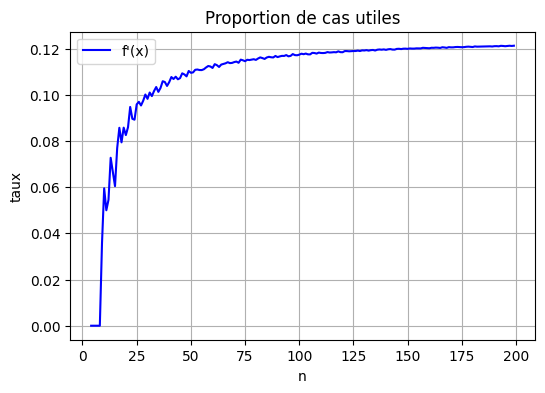

In [83]:
import numpy as np
import math
import matplotlib.pyplot as plt

x = 0 # c'est le n essai approximé en continue

# Récompenses pour dilème du prisonnier
T =  0 # Temptation
R = -1 # Reward
P = -2 # Punishement
S = -3 # Sucker's


def calcul(a, b, c, d):
    """
    Fonction qui retourne la différence de moyenne entre l'action A et l'action B pour l'agent 1
    """

  #an = a+(1-e)*(1-e)*x
  #bn = b+(1-e)*(e)*x
  #cn = c+(e)*(1-e)*x
  #dn = d+(e)*(e)*x
    return (a*R+b*S)/(a+b)-(c*T+d*P)/(c+d)



taux = []
xx=[]
test1=[]
test2=[]
max_iteration=200
for n in range(4,max_iteration):
  count=0
  count1=0
  for a in range(1,n-2):
    for b in range(1,n-a-1):
      for c in range(1,n-a-b):
        d = n-a-b-c
        if calcul(a,b,c,d) > 0:
          count+=1
  taux.append(count/math.comb(n-1, 3))
  xx.append(n)
  print(n,count/math.comb(n+3, 3))


plt.figure(figsize=(6, 4))
plt.plot(xx, taux, label="f'(x)", color='blue')
plt.xlabel('n')
plt.ylabel("taux")
plt.title("Proportion de cas utiles")
plt.legend()
plt.grid(True)
plt.show()

In [85]:
print(calcul(2000,3,1,4)>0)



True


Calcul de dérivée


In [86]:
import sympy

x = sympy.Symbol('x', real=True, positive=True)
a, b, c, d = sympy.symbols('a b c d', integer=True, positive=True)
R, S, T, P = sympy.symbols('R S T P', real=True, positive=True)
e = sympy.Symbol('e', real=True, positive=True)
condition_e = sympy.And(e < 0.5, e > 0)

an=a+(1-e)*(1-e)*x
bn=b+(1-e)*(e)*x
cn=c+(e)*(1-e)*x
dn=d+(e)*(e)*x

ua = (an*R+bn*S)/(an+bn)
ub = (cn*T+dn*P)/(cn+dn)
f = ua-ub

In [87]:
solution = sympy.solve(f, x)
print(solution)

[(P*a*e**2 + P*b*e**2 - P*d*e + P*d - R*a*e - R*c*e**2 + 2*R*c*e - R*c - R*d*e**2 + 2*R*d*e - R*d - S*b*e + S*c*e**2 - S*c*e + S*d*e**2 - S*d*e - T*a*e**2 + T*a*e - T*b*e**2 + T*b*e - T*c*e + T*c - sqrt(P**2*a**2*e**4 + 2*P**2*a*b*e**4 + 2*P**2*a*d*e**3 - 2*P**2*a*d*e**2 + P**2*b**2*e**4 + 2*P**2*b*d*e**3 - 2*P**2*b*d*e**2 + P**2*d**2*e**2 - 2*P**2*d**2*e + P**2*d**2 - 2*P*R*a**2*e**3 - 2*P*R*a*b*e**3 - 2*P*R*a*c*e**4 + 2*P*R*a*c*e**2 - 2*P*R*a*d*e**4 + 4*P*R*a*d*e**3 - 4*P*R*a*d*e**2 + 2*P*R*a*d*e - 2*P*R*b*c*e**4 + 4*P*R*b*c*e**3 - 2*P*R*b*c*e**2 - 2*P*R*b*d*e**4 + 8*P*R*b*d*e**3 - 10*P*R*b*d*e**2 + 4*P*R*b*d*e + 2*P*R*c*d*e**3 - 6*P*R*c*d*e**2 + 6*P*R*c*d*e - 2*P*R*c*d + 2*P*R*d**2*e**3 - 6*P*R*d**2*e**2 + 6*P*R*d**2*e - 2*P*R*d**2 - 2*P*S*a*b*e**3 + 2*P*S*a*c*e**4 - 2*P*S*a*c*e**3 + 2*P*S*a*d*e**4 - 6*P*S*a*d*e**3 + 4*P*S*a*d*e**2 - 2*P*S*b**2*e**3 + 2*P*S*b*c*e**4 - 6*P*S*b*c*e**3 + 4*P*S*b*c*e**2 + 2*P*S*b*d*e**4 - 10*P*S*b*d*e**3 + 10*P*S*b*d*e**2 - 2*P*S*b*d*e - 2*P*S*c*d*e**3 

In [88]:
fprime = sympy.diff(f, x)
print("f'(x) =", sympy.simplify(fprime))

f'(x) = (e*(-P*e + T*(e - 1))*(a + b - e*x*(e - 1) + x*(e - 1)**2)**2*(c + d + e**2*x - e*x*(e - 1)) + e*(P*(d + e**2*x) + T*(c - e*x*(e - 1)))*(a + b - e*x*(e - 1) + x*(e - 1)**2)**2 + (e - 1)*(R*(a + x*(e - 1)**2) + S*(b - e*x*(e - 1)))*(c + d + e**2*x - e*x*(e - 1))**2 + (e - 1)*(R*(e - 1) - S*e)*(a + b - e*x*(e - 1) + x*(e - 1)**2)*(c + d + e**2*x - e*x*(e - 1))**2)/((a + b - e*x*(e - 1) + x*(e - 1)**2)**2*(c + d + e**2*x - e*x*(e - 1))**2)


In [89]:

print("f''(x) = ", sympy.simplify(sympy.diff(fprime,x)))

f''(x) =  2*(e**2*(P*e - T*(e - 1))*(a + b - e*x*(e - 1) + x*(e - 1)**2)**3*(c + d + e**2*x - e*x*(e - 1)) - e**2*(P*(d + e**2*x) + T*(c - e*x*(e - 1)))*(a + b - e*x*(e - 1) + x*(e - 1)**2)**3 + (e - 1)**2*(R*(a + x*(e - 1)**2) + S*(b - e*x*(e - 1)))*(c + d + e**2*x - e*x*(e - 1))**3 + (e - 1)**2*(R*(e - 1) - S*e)*(a + b - e*x*(e - 1) + x*(e - 1)**2)*(c + d + e**2*x - e*x*(e - 1))**3)/((a + b - e*x*(e - 1) + x*(e - 1)**2)**3*(c + d + e**2*x - e*x*(e - 1))**3)


0.04471414883423819


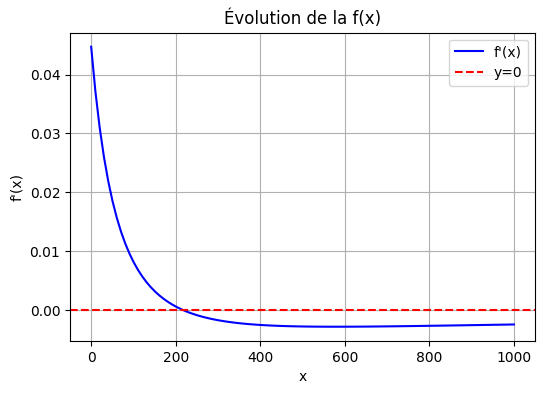

In [102]:
valeurs = {
    a: 100,
    b: 1,
    c: 30,
    d: 1,
    R: -1,
    S: -3,
    T: 0,
    P: -2,
    e: 0.2
}


f_num = sympy.lambdify(x, f.subs(valeurs), 'numpy')
print(f_num(0))
xs = np.linspace(0, 1000, 100)
vals = [f_num(xi) for xi in xs]

# 7) Tracé du graphe de f(x)
plt.figure(figsize=(6, 4))
plt.plot(xs, vals, label="f'(x)", color='blue')
plt.axhline(y=0, color='red', linestyle='--', label="y=0")
plt.xlabel('x')
plt.ylabel("f'(x)")
plt.title("Évolution de la f(x)")
plt.legend()
plt.grid(True)
plt.show()

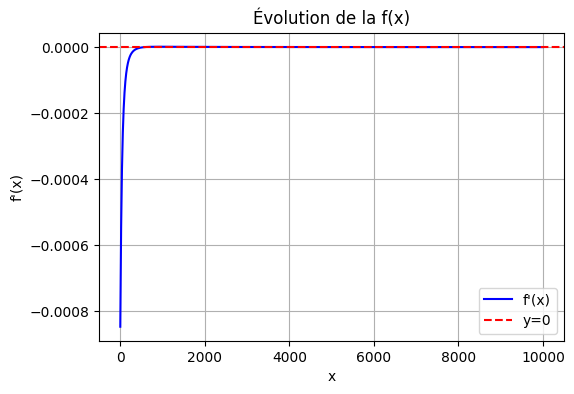

In [103]:
valeurs = {
    a: 100,
    b: 1,
    c: 30,
    d: 1,
    R: -1,
    S: -3,
    T: 0,
    P: -2,
    e: 0.2
}

f_num = sympy.lambdify(x, fprime.subs(valeurs), 'numpy')
xs = np.linspace(0, 10000, 1000)
vals = [f_num(xi) for xi in xs]

# 7) Tracé du graphe de f(x)
plt.figure(figsize=(6, 4))
plt.plot(xs, vals, label="f'(x)", color='blue')
plt.axhline(y=0, color='red', linestyle='--', label="y=0")
plt.xlabel('x')
plt.ylabel("f'(x)")
plt.title("Évolution de la f(x)")
plt.legend()
plt.grid(True)
plt.show()